# BollyWood DataSet Visualization

In [305]:
# Can we save the time and money wasted by movie viewers on viewing flop and disaster movies? 
# Can we suggest must-watch movies to movie viewers even 
# before movies release? Can we classify upcoming movies into 1 of 9 categories even before their release?

In [306]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [307]:
df_movie = pd.read_csv('BollywoodMovieDetail.csv')
df_actor = pd.read_csv('BollywoodActorRanking.csv')
df_director = pd.read_csv('BollywoodDirectorRanking.csv')


df_movie.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


In [308]:
df_actor.head()

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716


In [309]:
df_director.head()

,directorId,directorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,1,Rajkumar Hirani,3,440,10.00000,146000,2.07796,10.00000
1,2,Farah Khan,4,440,7.39474,1060000,8.88317,8.78473
2,3,Karan Johar,5,430,5.68947,1050000,8.80872,7.10460
3,4,Sajid Khan,4,350,5.79605,905000,7.72912,6.99780
4,5,Rohit Shetty,10,950,6.32895,437000,4.24461,6.83761


In [310]:
df_movie.isnull().values.any()

True

In [311]:
df_actor.isnull().values.any()


True

In [312]:
df_director.isnull().values.any()

True

In [313]:
df_movie.isnull().sum()

imdbId           0
title            0
releaseYear      0
releaseDate     53
genre            2
writers        119
actors           3
directors        4
sequel           3
hitFlop          0
dtype: int64

In [314]:
df_actor.isnull().sum()

actorId                   0
actorName                 0
movieCount                0
ratingSum                 0
normalizedMovieRank       2
googleHits                0
normalizedGoogleRank    112
normalizedRating          0
dtype: int64

In [315]:
df_director.isnull().sum()

directorId              0
directorName            1
movieCount              0
ratingSum               0
normalizedMovieRank     0
googleHits              0
normalizedGoogleRank    0
normalizedRating        0
dtype: int64

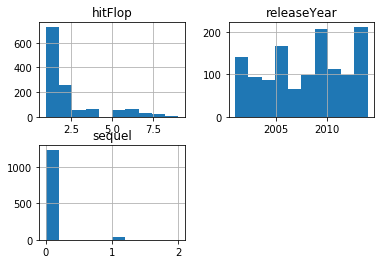

In [316]:
df_movie.hist()
plt.show()

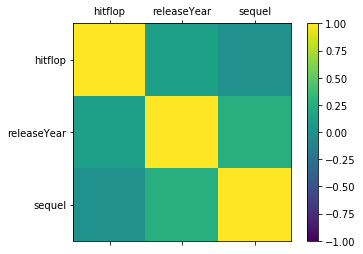

In [317]:
names = ['hitflop', 'releaseYear', 'sequel']
correlations = df_movie.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [318]:
print(df_movie.shape)

(1284, 10)


In [319]:
print(df_movie['directors'].unique())

['Deepak Sareen' 'Ashutosh Gowariker' 'Pankaj Parashar | S.M. Iqbal'
 'K.S. Adiyaman' 'Shashilal K. Nair' 'Sanjay Leela Bhansali'
 'Vikram Bhatt' 'Karan Johar' 'Arjun Sablok' 'Subhash Ghai'
 'Shyam Benegal' 'Abbas Alibhai Burmawalla | Mastan Alibhai Burmawalla'
 'Sooraj R. Barjatya' 'Naeem Sha' 'Madhur Bhandarkar' 'Rahul Rawail'
 'Dev Anand' 'Raj Kanwar' 'Harry Baweja' 'Kunal Kohli' 'Kalpana Lajmi'
 'Indra Kumar' 'Rajat Rawail' 'Kirti Kumar' 'Prakash Jha' 'David Dhawan'
 'Aziz Sejawal' 'Daisy von Scherler Mayer' 'Rajat Mukherjee' 'Goldie Behl'
 'Anil Sharma' 'Satish Kaushik' 'Joy Augustine' 'Eeshwar Nivas'
 'Rajan Johri' 'Rakeysh Omprakash Mehra' 'Anubhav Sinha' 'S. Shankar'
 'Farhan Akhtar' 'Ahathian | Sunil Kumar Agrawal' 'Deepak S. Shivdasani'
 'Rajkumar Santoshi' 'Sanjay Gupta' 'Deepak Balraj Vij' 'Nisha Pahuja'
 'Ram Gopal Varma' 'Sanjay Khanna' 'Priyadarshan' 'Tanuja Chandra'
 'Gautham Menon' 'N. Maharajan' 'Ashu Trikha' 'Ashok Mehta'
 'Mahesh Manjrekar' 'Ved Rahi' 'K. Raghavendr

In [320]:
print(df_movie.groupby('directors').size())

directors
A. Muthu                                                                                                                                   1
A.R. Murugadoss                                                                                                                            2
Aamir Khan | Amole Gupte                                                                                                                   1
Aanand Rai                                                                                                                                 3
Aarif Sheikh                                                                                                                               1
Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hooda | Shishir Jha | Atanu Mukherjee | Rukshana Tabassum | Ankit Tripathi | Palash Vaswani     1
Aatish Kapadia                                                                                                                             1
Abb

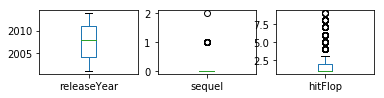

In [321]:
df_movie.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [333]:
# directors = df['directors']
directors = df_movie.groupby('directors')
# directors


vectorizer = CountVectorizer(min_df=1)

X = vectorizer.fit_transform(list(zip(*directors))[0]).toarray()


print(X.shape)
X


# # #SGDClassifier
# clf = linear_model.SGDClassifier()

# # df = df.fillna(lambda x: x.median()).astype(np.float)
# df_movie.fillna(df_movie['sequel'].median(), inplace=True)


# # feature_names = ['releaseYear', 'sequel']
# X = df['releaseYear']
# Y = df['hitFlop']



# # X = df['']
# # y = df['hitflop']


# clf.fit(X, Y)
# # clf.fit(X.as_matrix().astype(np.float), Y.as_matrix().astype(np.float))


# # clf.predict(X)

# # df_movie['sequel'].isnull().values.any()
# # df_movie['sequel']
# # df_movie['sequel'].isnull().sum()

(731, 977)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [335]:
vectorizer.get_feature_names()[:25]

['aamir',
 'aanand',
 'aarif',
 'aarti',
 'aatish',
 'abbas',
 'abhik',
 'abhinav',
 'abhinay',
 'abhishek',
 'abrar',
 'acharya',
 'adajania',
 'adams',
 'adarsh',
 'adeeb',
 'adhikari',
 'adi',
 'aditya',
 'adiyaman',
 'advani',
 'afzal',
 'aggarwal',
 'agnihotri',
 'agrawal']

In [337]:
df['hitFlop'][df['directors'] == 'Ashutosh Gowariker']


1      6
188    2
354    5
666    1
839    1
Name: hitFlop, dtype: int64